In [25]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from joblib import dump
from joblib import parallel_backend

In [26]:
df = pd.read_csv('../global_preprocessed_without_onehot.csv', encoding='ISO-8859-1')
df = df[["nkill", "nperps"]]
row_count = df.shape[0]
column_count = df.shape[1]
df = df[:row_count//10]
row_count = df.shape[0]
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')


The DataFrame has 17128 rows.
The DataFrame has 2 columns.


In [27]:
# Define the parameter grid
k_values = range(2,12) # Will test k from 3 to 11

# Store silhouette scores and k values
silhouette_scores = []
k_values_used = []
kmeans_array = []

In [28]:
# Perform "Grid Search"
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)
    kmeans_array.append(kmeans)
    k_values_used.append(k)

Best k: 2


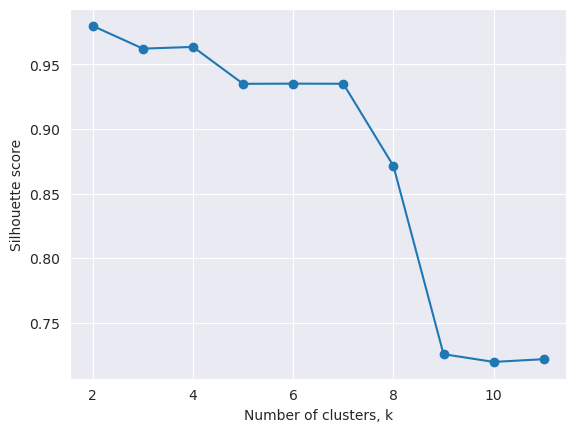

In [29]:
# Determine the best k
best_k = k_values_used[silhouette_scores.index(max(silhouette_scores))]
best_model = kmeans_array[silhouette_scores.index(max(silhouette_scores))]
print('Best k:', best_k)

# Plot
plt.plot(k_values_used, silhouette_scores, marker='o')
plt.xlabel("Number of clusters, k")
plt.ylabel("Silhouette score")
plt.show()


In [30]:
dump(best_model, "kmeans_model.joblib")

['kmeans_model.joblib']